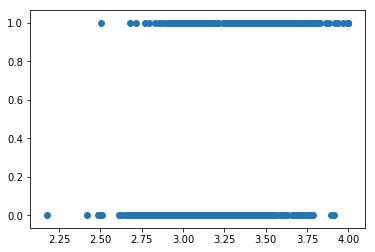

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
admissions = pd.read_csv('admissions.csv')
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa']], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[[ 0.63387918  0.36612082]
 [ 0.57129471  0.42870529]
 [ 0.74047131  0.25952869]
 ..., 
 [ 0.64994531  0.35005469]
 [ 0.53382227  0.46617773]
 [ 0.53831911  0.46168089]]


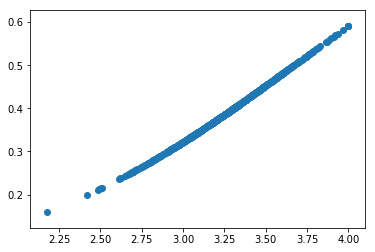

In [5]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs = logistic_model.predict_proba(admissions[['gpa']])
print(pred_probs)
%matplotlib inline
plt.scatter(admissions['gpa'], pred_probs[:,1])


In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

fitted_labels = logistic_model.predict(admissions[['gpa']])
fitted_labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
admissions['gpa'].head(10)

0    3.177277
1    3.412655
2    2.728097
3    3.093559
4    3.141923
5    3.599108
6    3.238972
7    3.420177
8    3.562482
9    3.910495
Name: gpa, dtype: float64

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

admissions['predicted_label'] = model.predict(admissions[['gpa']])
print(admissions['predicted_label'].value_counts())

admissions.head(5)

0    598
1     46
Name: predicted_label, dtype: int64


,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [9]:
rename_cols = {'admit':'actual_label'}

admissions.rename(columns=rename_cols, inplace=True)
admissions.head(5)

matches = admissions['actual_label'] == admissions['predicted_label']

correct_predictions = admissions[matches]

print(correct_predictions.head(5))

accuracy = len(correct_predictions)/len(admissions)
accuracy

   actual_label       gpa         gre  predicted_label
0             0  3.177277  594.102992                0
1             0  3.412655  631.528607                0
2             0  2.728097  553.714399                0
3             0  3.093559  551.089985                0
4             0  3.141923  537.184894                0


0.6459627329192547

In [10]:
# From the previous screen
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])


false_negatives = len(admissions[(admissions['predicted_label'] == 0) & (admissions['actual_label'] == 1)])

sensitivity = true_positives / (true_positives + false_negatives)
sensitivity

0.12704918032786885

### Cross Validation

In [12]:
import numpy as np

np.random.seed(8)
admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

index = np.random.permutation(len(admissions))
shuffled_admissions = admissions.loc[index]

train = shuffled_admissions[0:515]
test = shuffled_admissions[515:]


In [13]:
len(admissions)

644

In [14]:
len(train)

515

In [15]:
len(test)

129

In [16]:
test.head()

,gpa,gre,actual_label
117,3.219669,483.761856,0
121,2.799225,654.216375,0
214,3.247795,518.556697,0
452,3.567595,591.399738,1
447,3.448206,546.646023,1


In [17]:
train.head()

,gpa,gre,actual_label
260,3.414036,577.665610,0
173,2.932147,564.798764,0
256,2.674040,599.895858,0
167,2.923581,622.524665,0
400,3.414376,704.934217,1


In [18]:
import numpy as np
np.random.seed(8)

shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]
train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]

lr = LogisticRegression()
lr.fit(train[['gpa']], train['actual_label'])
test['predicted_label'] = lr.predict(test[['gpa']])
accuracy = len(test[test['predicted_label'] == test['actual_label']]) / len(test)
accuracy

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.6356589147286822

In [20]:
model = LogisticRegression()
model.fit(train[["gpa"]], train["actual_label"])
labels = model.predict(test[["gpa"]])
test["predicted_label"] = labels
matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
accuracy = len(correct_predictions) / len(test)

true_positive_filter = (test['actual_label'] == 1) & (test['predicted_label'] == 1)
true_positive = test[true_positive_filter]

true_negative_filter = (test['actual_label'] == 0) & (test['predicted_label'] == 0)
true_negative = test[true_negative_filter]

false_positive_filter = (test['actual_label'] == 0) & (test['predicted_label'] == 1)
false_positive = test[false_positive_filter]

false_nagative_filter = (test['actual_label'] == 1) & (test['predicted_label'] == 0)
false_negative = test[false_nagative_filter]

sensitivity = len(true_positive) / (len(true_positive) + len(false_negative))
specificity = len(true_negative) / (len(false_positive) + len(true_negative))

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
sensitivity

0.08333333333333333

In [22]:
specificity

0.9629629629629629

### ROC Curve
Receiver Operator Curve
allows us to understand a classification model's performance as the discrimination threshold is varied

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
probabilites = model.predict_proba(test[['gpa']])
fpr, tpr, thresholds = roc_curve(test['actual_label'], probabilites[:,:1])

In [29]:
fpr

array([ 0.        ,  0.01234568,  0.01234568,  0.02469136,  0.02469136,
        0.04938272,  0.04938272,  0.07407407,  0.07407407,  0.09876543,
        0.09876543,  0.14814815,  0.14814815,  0.18518519,  0.18518519,
        0.20987654,  0.20987654,  0.22222222,  0.22222222,  0.2345679 ,
        0.2345679 ,  0.25925926,  0.25925926,  0.28395062,  0.28395062,
        0.2962963 ,  0.2962963 ,  0.30864198,  0.30864198,  0.34567901,
        0.34567901,  0.48148148,  0.48148148,  0.49382716,  0.49382716,
        0.50617284,  0.50617284,  0.5308642 ,  0.5308642 ,  0.60493827,
        0.60493827,  0.67901235,  0.67901235,  0.69135802,  0.69135802,
        0.81481481,  0.81481481,  0.85185185,  0.85185185,  0.86419753,
        0.86419753,  0.87654321,  0.87654321,  0.90123457,  0.90123457,
        0.95061728,  0.95061728,  0.96296296,  0.96296296,  0.97530864,
        0.97530864,  0.98765432,  0.98765432,  1.        ])

In [30]:
tpr

array([ 0.        ,  0.        ,  0.02083333,  0.02083333,  0.04166667,
        0.04166667,  0.0625    ,  0.0625    ,  0.08333333,  0.08333333,
        0.10416667,  0.10416667,  0.125     ,  0.125     ,  0.16666667,
        0.16666667,  0.1875    ,  0.1875    ,  0.20833333,  0.20833333,
        0.22916667,  0.22916667,  0.25      ,  0.25      ,  0.33333333,
        0.33333333,  0.35416667,  0.35416667,  0.375     ,  0.375     ,
        0.39583333,  0.39583333,  0.41666667,  0.41666667,  0.4375    ,
        0.4375    ,  0.45833333,  0.45833333,  0.47916667,  0.47916667,
        0.5       ,  0.5       ,  0.54166667,  0.54166667,  0.5625    ,
        0.5625    ,  0.60416667,  0.60416667,  0.625     ,  0.625     ,
        0.70833333,  0.70833333,  0.72916667,  0.72916667,  0.75      ,
        0.75      ,  0.8125    ,  0.8125    ,  0.9375    ,  0.9375    ,
        0.97916667,  0.97916667,  1.        ,  1.        ])

In [31]:
thresholds

array([ 1.78692646,  0.78692646,  0.78383381,  0.76146221,  0.74990314,
        0.7473307 ,  0.74218033,  0.72482535,  0.72473257,  0.71932494,
        0.71712937,  0.70207341,  0.700361  ,  0.69370461,  0.69043335,
        0.68453476,  0.68134609,  0.67873043,  0.67832046,  0.67452093,
        0.67174067,  0.66663941,  0.66608775,  0.66277814,  0.66043227,
        0.65840742,  0.65837638,  0.65664338,  0.65600094,  0.65471524,
        0.65462761,  0.64183876,  0.63782205,  0.63092382,  0.63079164,
        0.62959682,  0.62816303,  0.62619659,  0.62599335,  0.61666166,
        0.61624815,  0.6099869 ,  0.60854498,  0.60685172,  0.6010473 ,
        0.58828351,  0.58438201,  0.5721033 ,  0.57026233,  0.56816509,
        0.55555046,  0.55337161,  0.55264529,  0.55027642,  0.54595656,
        0.53676447,  0.51848024,  0.51521384,  0.48822348,  0.48590517,
        0.4732471 ,  0.47230282,  0.44107018,  0.43300435])

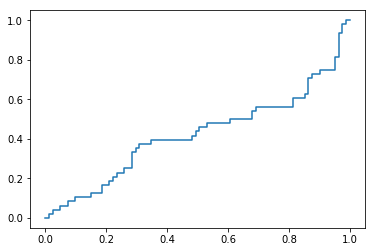

In [32]:
plt.plot(fpr, tpr)

### AROC (AREA under the curve)
We can now go one step further and determine the area under the curve or AUC for short. The AUC describes the probability that the classifier will rank a random positive observation higher than a random negative observation. 

In [33]:

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(test['actual_label'], probabilites[:,1])
auc_score

0.57793209876543217

### K Fold Cross Validation

In [36]:
import pandas as pd

admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]
admissions = shuffled_admissions.reset_index()

admissions.ix[0:128, 'fold'] = 1
admissions.ix[129:257, 'fold'] = 2
admissions.ix[258:386, 'fold'] = 3
admissions.ix[387:514, 'fold'] = 4
admissions.ix[515:645, 'fold'] = 5

admissions['fold'] = admissions['fold'].astype('int')

print(admissions.head())
print(admissions.tail())
print(admissions[120:130])


   index       gpa         gre  actual_label  fold
0    608  3.774355  717.463598             1     1
1    363  3.092351  656.186812             0     1
2    551  3.068853  754.171894             1     1
3     14  3.298133  628.178205             0     1
4    158  3.068724  714.981934             0     1
     index       gpa         gre  actual_label  fold
639    571  3.205237  752.190874             1     5
640    639  3.381359  720.718438             1     5
641    145  2.804895  544.943178             0     5
642    281  3.053863  729.928654             0     5
643    387  3.321899  543.174854             0     5
     index       gpa         gre  actual_label  fold
120    548  3.298076  771.875487             1     1
121    408  3.179445  730.248802             1     1
122    149  2.873149  649.539246             0     1
123    308  3.171177  497.847973             0     1
124    320  3.012033  639.403420             0     1
125    594  3.014846  774.615214             1     1
126  

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

def kfold_lr(k_fold):
    train = admissions[admissions['fold'] != k_fold]
    test = admissions[admissions['fold'] == k_fold]
    lr.fit(train[['gpa']], train['actual_label'])
    test['prediction_label'] = lr.predict(test[['gpa']])
    correct_pred = test[test['actual_label'] == test['prediction_label']]
    return len(correct_pred)/len(test)

iteration_one_accuracy = kfold_lr(1)
iteration_one_accuracy


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.6124031007751938

In [38]:
def train_and_test(folds):
    accuracies = []
    for f in folds:
        accuracies.append(kfold_lr(f))
    return accuracies

accuracies = train_and_test([1,2,3,4,5])
average_accuracy = np.mean(accuracies)
print(accuracies)
print(average_accuracy)


[0.6124031007751938, 0.6589147286821705, 0.627906976744186, 0.65625, 0.6434108527131783]
0.639777131783


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### sklear k-fold

In [40]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

kf = KFold(len(admissions), 5, shuffle=True, random_state=8)

lr = LogisticRegression()

accuracies = cross_val_score(lr, admissions[['gpa']], admissions['actual_label'], scoring='accuracy', cv=kf)

print(accuracies)
average_accuracy = np.mean(accuracies)
average_accuracy

[ 0.6124031   0.65891473  0.64341085  0.6744186   0.6328125 ]


0.64439195736434107